In [2]:
import json
from collections import Counter
from pathlib import Path

import kagglehub
import matplotlib.pyplot as plt
import pandas as pd

/home/nates/repos/recipe-recommender/backend/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
# Download latest version
recipe_path = Path(kagglehub.dataset_download("shuyangli94/foodcom-recipes-with-search-terms-and-tags"))
cuisine_path = Path(kagglehub.dataset_download("kaggle/recipe-ingredients-dataset"))

print("Path to cuisine dataset files:", cuisine_path)
print("Path to recipe dataset files:", recipe_path)

Path to cuisine dataset files: /home/nates/.cache/kagglehub/datasets/kaggle/recipe-ingredients-dataset/versions/1
Path to recipe dataset files: /home/nates/.cache/kagglehub/datasets/shuyangli94/foodcom-recipes-with-search-terms-and-tags/versions/2


In [4]:
df = pd.read_csv(recipe_path / "recipes_w_search_terms.csv")

In [5]:
df

,id,name,description,ingredients,ingredients_raw_str,serving_size,servings,steps,tags,search_terms
0,96313,Grilled Garlic Cheese Grits,"We love grits, this is another good way to ser...","['water', 'grits', 'salt', 'cheddar cheese', '...","[""4 cups water"",""1 cup uncooked old f...",1 (155 g),8,"['I a sauce pan, bring water to a boil; slowly...","['time-to-make', 'course', 'main-ingredient', ...","{'diabetic', 'low-calorie', 'vegetarian', 'low..."
1,232037,Simple Shrimp and Andouille Jambalaya,"Simple, easy and very tasty for when you are i...","['onion', 'red bell pepper', 'garlic cloves', ...","[""1 medium onion, chopped coarse "",""1 m...",1 (366 g),4,"['In a food processor, pulse the onion, red pe...","['60-minutes-or-less', 'time-to-make', 'course...","{'dinner', 'shrimp'}"
2,41090,black-and-white bean salad,NaN,"['white beans', 'canned black beans', 'tomatoe...","[""1 cup canned white beans, rinsed and dra...",1 (807 g),1,"['In a large bowl, combine beans, tomato, onio...","['15-minutes-or-less', 'time-to-make', 'course...","{'vegetarian', 'salad', 'side', 'dinner', 'veg..."
3,60656,Crock Pot Italian Zucchini,This is a good recipe for weight watchers. It ...,"['zucchini', 'yellow squash', 'diced tomatoes'...","[""2 zucchini, sliced "",""2 small yel...",1 (244 g),4,['Put all ingredients in the crock pot and coo...,"['weeknight', 'time-to-make', 'course', 'main-...","{'side', 'vegetarian', 'italian'}"
4,232047,Beef Stew With Dried Cherries,This is a fabulous stew that came from one of ...,"['beef stew meat', 'flour', 'salt', 'allspice'...","[""3 lbs beef stew meat"",""3 tablespoons ...",1 (358 g),8,"['Preheat oven to 350°F.', ""Cut beef into 1 in...","['time-to-make', 'course', 'main-ingredient', ...",{'dinner'}
...,...,...,...,...,...,...,...,...,...,...
494958,276465,Blackberry Orange Scones,"The orange zest makes for a flavorful, not ove...","['unbleached flour', 'baking soda', 'butter', ...","[""2 1/2 cups unbleached flour"",""2 teaspo...",1 (83 g),8,['Sift about 2 cups of flour onto a piece of w...,"['30-minutes-or-less', 'time-to-make', 'course...","{'breakfast', 'bread'}"
494959,257796,Slow Cooker Garlic Chicken With Rosemary,Delicious and easy!,"['roasting chickens', 'lemons', 'rosemary spri...","[""1 (5 lb) roasting chickens, rinsed and ...",1 (340 g),6,"['Place rosemary springs, 1 lemon half, celery...","['main-ingredient', 'preparation', 'occasion',...","{'dinner', 'chicken'}"
494960,78003,Pot Roast with Port (Stove Top),This is a recipe from the Frugal Gourmet cooki...,"['boneless beef chuck roast', 'olive oil', 'ta...","[""2 -3 lbs boneless beef chuck roast"",""2 ...",1 (283 g),4,"['In a large pan, heat oil and brown roast on ...","['weeknight', 'time-to-make', 'course', 'prepa...","{'roast', 'dinner', 'low-sodium', 'low-carb'}"
494961,328810,Kapusta ( Cabbage and Kielbasa ),Cabbage and sausage in tomato sauce,"['cabbage', 'condensed tomato soup', 'kielbasa...","[""8 cups cabbage or 2 heads cabbage,...",1 (564 g),6,['Saute bacon in large pan until browned. Lea...,"['time-to-make', 'course', 'preparation', 'mai...",{'dinner'}


In [21]:
tags_counter = Counter()

In [24]:
for tags in df["tags"]:
    tags = json.loads(tags.replace('\'', '"').replace('{', '[').replace('}', ']'))

    tags_counter.update(tags)

In [25]:
tags_counter

Counter({'preparation': 491234,
         'time-to-make': 478304,
         'course': 465809,
         'main-ingredient': 345857,
         'dietary': 329850,
         'easy': 260420,
         'occasion': 224555,
         'cuisine': 181633,
         'low-in-something': 181009,
         '60-minutes-or-less': 154081,
         'main-dish': 151106,
         'equipment': 121944,
         '30-minutes-or-less': 116312,
         'number-of-servings': 114986,
         'meat': 114003,
         '4-hours-or-less': 111764,
         'vegetables': 105643,
         'desserts': 104679,
         '3-steps-or-less': 104065,
         'taste-mood': 97333,
         'north-american': 94537,
         'low-sodium': 94021,
         'low-carb': 88682,
         'healthy': 84242,
         '15-minutes-or-less': 84105,
         'low-cholesterol': 77090,
         'low-calorie': 75984,
         'dinner-party': 72890,
         '5-ingredients-or-less': 71175,
         'low-protein': 69393,
         'vegetarian': 68617,
    

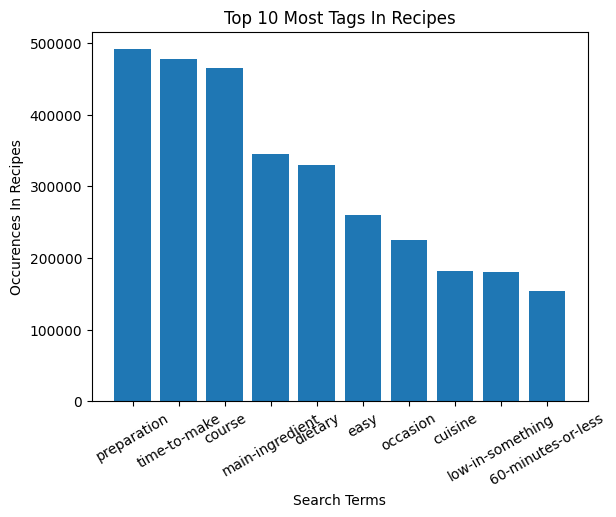

In [26]:
tags, counts = zip(*tags_counter.most_common(10))

plt.bar(tags, counts)
plt.xticks(rotation=30)
plt.xlabel("Search Terms")
plt.ylabel("Occurences In Recipes")
plt.title("Top 10 Most Tags In Recipes")
plt.show()

In [6]:
search_terms_counter = Counter()

In [7]:
for search_terms in df["search_terms"]:
    search_terms = json.loads(search_terms.replace('\'', '"').replace('{', '[').replace('}', ']'))

    search_terms_counter.update(search_terms)

In [8]:
search_terms_counter

Counter({'dinner': 215836,
         'dessert': 116357,
         'low-sodium': 94179,
         'low-carb': 89649,
         'low-calorie': 76517,
         'healthy': 70941,
         'vegetarian': 69038,
         'side': 52576,
         'low-fat': 48050,
         'appetizer': 47845,
         'chicken': 46440,
         'lunch': 45056,
         'breakfast': 31198,
         'salad': 29113,
         'bread': 27818,
         'soup': 21121,
         'vegan': 20402,
         'cake': 20037,
         'italian': 17068,
         'snack': 16816,
         'southern': 15844,
         'mexican': 15629,
         'cookie': 14918,
         'diabetic': 13453,
         'pasta': 12926,
         'casserole': 11947,
         'pork': 11861,
         'pie': 11849,
         'gluten-free': 11809,
         'beef': 10676,
         'rice': 10518,
         'baked': 8522,
         'fish': 8405,
         'french': 8049,
         'shrimp': 7917,
         'lactose-free': 7695,
         'indian': 6566,
         'sandwich': 

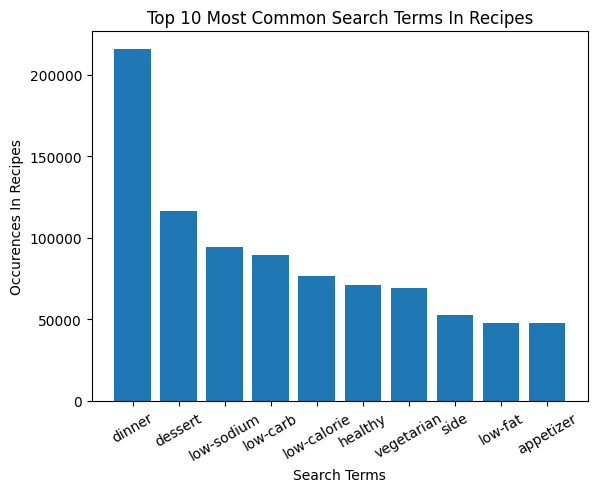

In [9]:
search_terms, counts = zip(*search_terms_counter.most_common(10))

plt.bar(search_terms, counts)
plt.xticks(rotation=30)
plt.xlabel("Search Terms")
plt.ylabel("Occurences In Recipes")
plt.title("Top 10 Most Common Search Terms In Recipes")
plt.show()

In [10]:
ingredient_counter = Counter()

In [11]:
for ingredient_list in df["ingredients"]:
    ingredient_list = json.loads(ingredient_list.replace('\'', '"'))

    ingredient_counter.update(ingredient_list)

In [12]:
ingredient_counter

Counter({'salt': 191553,
         'butter': 128360,
         'sugar': 109627,
         'onion': 84310,
         'eggs': 78881,
         'water': 77926,
         'olive oil': 72813,
         'flour': 60363,
         'milk': 57517,
         'garlic cloves': 57049,
         'pepper': 47465,
         'all-purpose flour': 41960,
         'brown sugar': 40624,
         'baking powder': 38463,
         'egg': 38285,
         'garlic': 34051,
         'vanilla': 32529,
         'baking soda': 32146,
         'salt and pepper': 31692,
         'parmesan cheese': 31101,
         'vegetable oil': 30255,
         'lemon juice': 30051,
         'cinnamon': 28038,
         'black pepper': 27203,
         'vanilla extract': 26729,
         'tomatoes': 26063,
         'sour cream': 25866,
         'unsalted butter': 24271,
         'cream cheese': 23052,
         'garlic clove': 22091,
         'oil': 22007,
         'celery': 21778,
         'garlic powder': 21764,
         'onions': 21165,
         

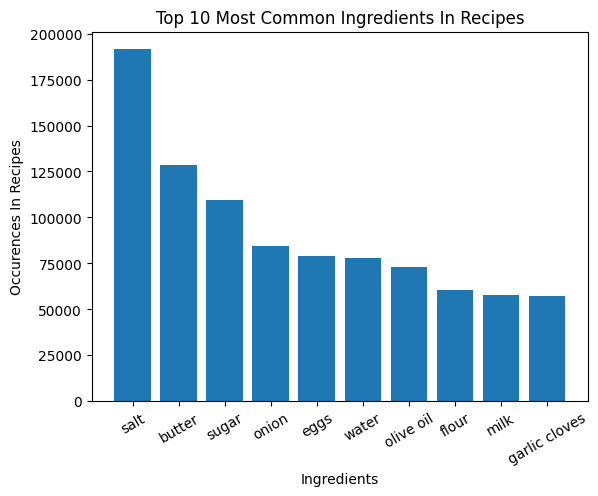

In [13]:
ingredients, counts = zip(*ingredient_counter.most_common(10))

plt.bar(ingredients, counts)
plt.xticks(rotation=30)
plt.xlabel("Ingredients")
plt.ylabel("Occurences In Recipes")
plt.title("Top 10 Most Common Ingredients In Recipes")
plt.show()

In [14]:
import pickle

with open('vectorizers/cuisine_vectorizer.pkl', 'rb') as f:
    vectorizer = pickle.load(f)
with open('models/cuisine_model.pkl', 'rb') as f:
    model = pickle.load(f)

In [15]:
import numpy as np

In [16]:
y_preds = []

In [17]:
for chunk in np.array_split(df, 5):
    X = chunk['ingredients'].apply(lambda x:  ' '.join(json.loads(x.replace('\'', '"'))))
    X_bow = vectorizer.transform(X).toarray()
    y_pred = model.predict(X_bow).tolist()
    y_preds += y_pred

/home/nates/repos/recipe-recommender/backend/.venv/lib/python3.12/site-packages/numpy/_core/fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [18]:
df["cuisine"] = y_preds

In [19]:
df.to_csv("data/recipe-ingredients-dataset.csv")

In [20]:
df

,id,name,description,ingredients,ingredients_raw_str,serving_size,servings,steps,tags,search_terms,cuisine
0,96313,Grilled Garlic Cheese Grits,"We love grits, this is another good way to ser...","['water', 'grits', 'salt', 'cheddar cheese', '...","[""4 cups water"",""1 cup uncooked old f...",1 (155 g),8,"['I a sauce pan, bring water to a boil; slowly...","['time-to-make', 'course', 'main-ingredient', ...","{'diabetic', 'low-calorie', 'vegetarian', 'low...",southern_us
1,232037,Simple Shrimp and Andouille Jambalaya,"Simple, easy and very tasty for when you are i...","['onion', 'red bell pepper', 'garlic cloves', ...","[""1 medium onion, chopped coarse "",""1 m...",1 (366 g),4,"['In a food processor, pulse the onion, red pe...","['60-minutes-or-less', 'time-to-make', 'course...","{'dinner', 'shrimp'}",cajun_creole
2,41090,black-and-white bean salad,NaN,"['white beans', 'canned black beans', 'tomatoe...","[""1 cup canned white beans, rinsed and dra...",1 (807 g),1,"['In a large bowl, combine beans, tomato, onio...","['15-minutes-or-less', 'time-to-make', 'course...","{'vegetarian', 'salad', 'side', 'dinner', 'veg...",italian
3,60656,Crock Pot Italian Zucchini,This is a good recipe for weight watchers. It ...,"['zucchini', 'yellow squash', 'diced tomatoes'...","[""2 zucchini, sliced "",""2 small yel...",1 (244 g),4,['Put all ingredients in the crock pot and coo...,"['weeknight', 'time-to-make', 'course', 'main-...","{'side', 'vegetarian', 'italian'}",italian
4,232047,Beef Stew With Dried Cherries,This is a fabulous stew that came from one of ...,"['beef stew meat', 'flour', 'salt', 'allspice'...","[""3 lbs beef stew meat"",""3 tablespoons ...",1 (358 g),8,"['Preheat oven to 350°F.', ""Cut beef into 1 in...","['time-to-make', 'course', 'main-ingredient', ...",{'dinner'},russian
...,...,...,...,...,...,...,...,...,...,...,...
494958,276465,Blackberry Orange Scones,"The orange zest makes for a flavorful, not ove...","['unbleached flour', 'baking soda', 'butter', ...","[""2 1/2 cups unbleached flour"",""2 teaspo...",1 (83 g),8,['Sift about 2 cups of flour onto a piece of w...,"['30-minutes-or-less', 'time-to-make', 'course...","{'breakfast', 'bread'}",irish
494959,257796,Slow Cooker Garlic Chicken With Rosemary,Delicious and easy!,"['roasting chickens', 'lemons', 'rosemary spri...","[""1 (5 lb) roasting chickens, rinsed and ...",1 (340 g),6,"['Place rosemary springs, 1 lemon half, celery...","['main-ingredient', 'preparation', 'occasion',...","{'dinner', 'chicken'}",southern_us
494960,78003,Pot Roast with Port (Stove Top),This is a recipe from the Frugal Gourmet cooki...,"['boneless beef chuck roast', 'olive oil', 'ta...","[""2 -3 lbs boneless beef chuck roast"",""2 ...",1 (283 g),4,"['In a large pan, heat oil and brown roast on ...","['weeknight', 'time-to-make', 'course', 'prepa...","{'roast', 'dinner', 'low-sodium', 'low-carb'}",italian
494961,328810,Kapusta ( Cabbage and Kielbasa ),Cabbage and sausage in tomato sauce,"['cabbage', 'condensed tomato soup', 'kielbasa...","[""8 cups cabbage or 2 heads cabbage,...",1 (564 g),6,['Saute bacon in large pan until browned. Lea...,"['time-to-make', 'course', 'preparation', 'mai...",{'dinner'},southern_us
